#Content

- **Manhattan Implementation**
- **Minkowski Implementation**
- **Weighted kNN**
- **Weighted kNN Implementation**


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 35.5MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|Fresh food products delivery count |
|**Milk**|milk products delivery count|
|**Grocery**|Grocery products delivery count|
|**Frozen**|Frozen food products delivery count|
|**Detergents_Paper**|washing products delivery count|
|**Delicassen**|imported products, cooked meat delivery count|
|**class**|Store catgeory (Class1, Class2, Class3)|





Now lets see the count of sample each of the three classes

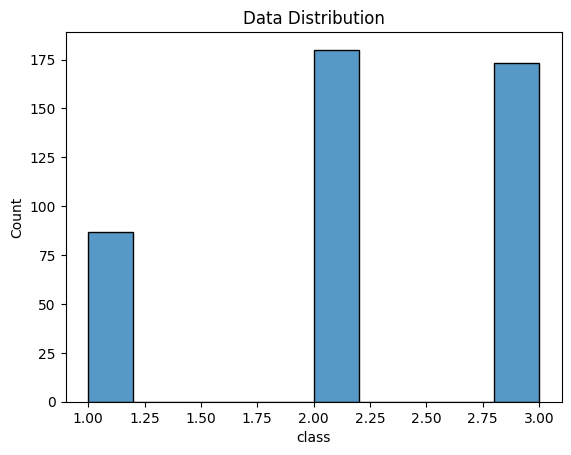

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

Lets now define our X and y for the model and visualize the data

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

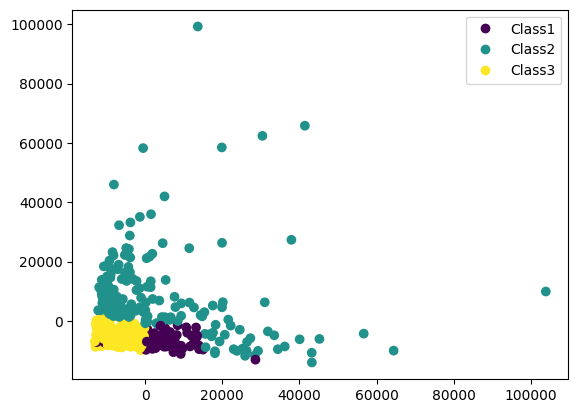

In [ ]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])



lets split the data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


## Manhattan implement the same using Sklearn's [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Fit method stores the training datapoints in the kNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')

knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan')

Accuracy of KNN on Test data

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9181818181818182

Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        20
           2       0.98      0.89      0.93        47
           3       0.90      1.00      0.95        43

    accuracy                           0.92       110
   macro avg       0.90      0.90      0.90       110
weighted avg       0.92      0.92      0.92       110



Confusion Matrix of KNN on Test Data

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

,1,2,3
1,16,1,3
2,3,42,2
3,0,0,43


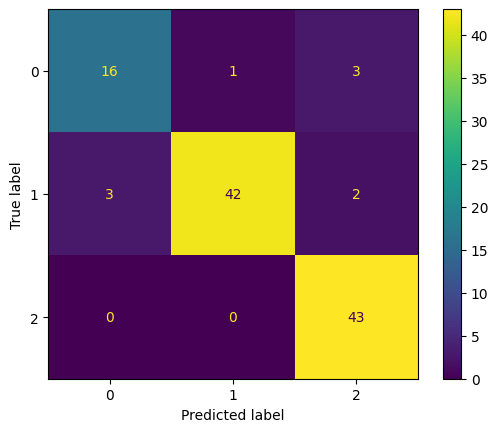

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

**Notice**

The kNN model is quite robust in its prediction for each of the classes



##Minkowski implement the same using Sklearn's [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Fit method stores the training datapoints in the kNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p = 4)

knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(p=4)

Accuracy of KNN on Test data

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9363636363636364

Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       0.98      0.91      0.95        47
           3       0.93      1.00      0.97        43

    accuracy                           0.94       110
   macro avg       0.92      0.92      0.92       110
weighted avg       0.94      0.94      0.94       110



Confusion Matrix of KNN on Test Data

In [ ]:

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

,1,2,3
1,17,1,2
2,3,43,1
3,0,0,43


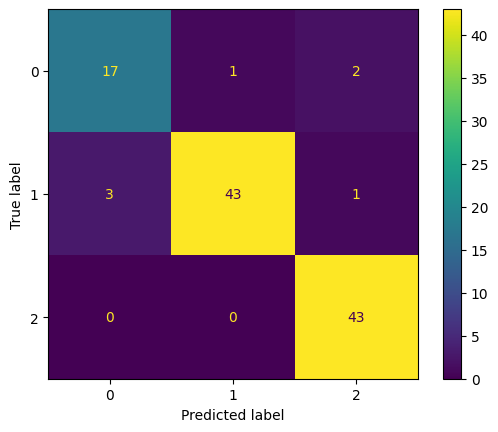

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

**Notice**

The kNN model is quite robust in its prediction for each of the classes





## **Weighted KNN**

#### Question: What if we take K as even number, such that we have 2 +ve class labels and 2 -ve class  and 2  'o' class labels as top 6 neighbors?
Ans: This can make the predictions wrongs, hence as a rule of thumb we tend on taking only odd values of K

Even with an Odd value of K:  

if we have K = 5,
    - we have 1 'o' datapoint very close to  $x_q$
    - And 3 +ve datapoints far off of $x_q$.  
    - And 1 -ve datapoint far off of $x_q$.  

- According to Majority vote, $x_q$ will belong to class +ve
- even though, 'o' class datapoints are close to the $x_q$

#### How can we avoid KNN model to not make such wrong predictions?
- By manupilating with value of K

#### But what if we can only take K = 5 ?
- till now, we have given same weightage to each K datapoints
- Now lets give weightage as inverse of Distance ($ {Weight} =  \frac{1}{distance} $)
- hence points closer to $x_q$ now have higher weights (=10) than weights(=2) for points further away
- Now if we take a weighted sum of all class labels:
    - 'o' class label will have weight = 10
    - -ve class label will have weight = 2
    - +ve class labels will have weight = (2+2+2) = 6

- Now $x_q$ will be predicted as 'o' class data point.

This way of using weights to find the class label for $x_q$ is what Weighted KNN is all about.




We simple allow it to be a part of any of the classes at random.

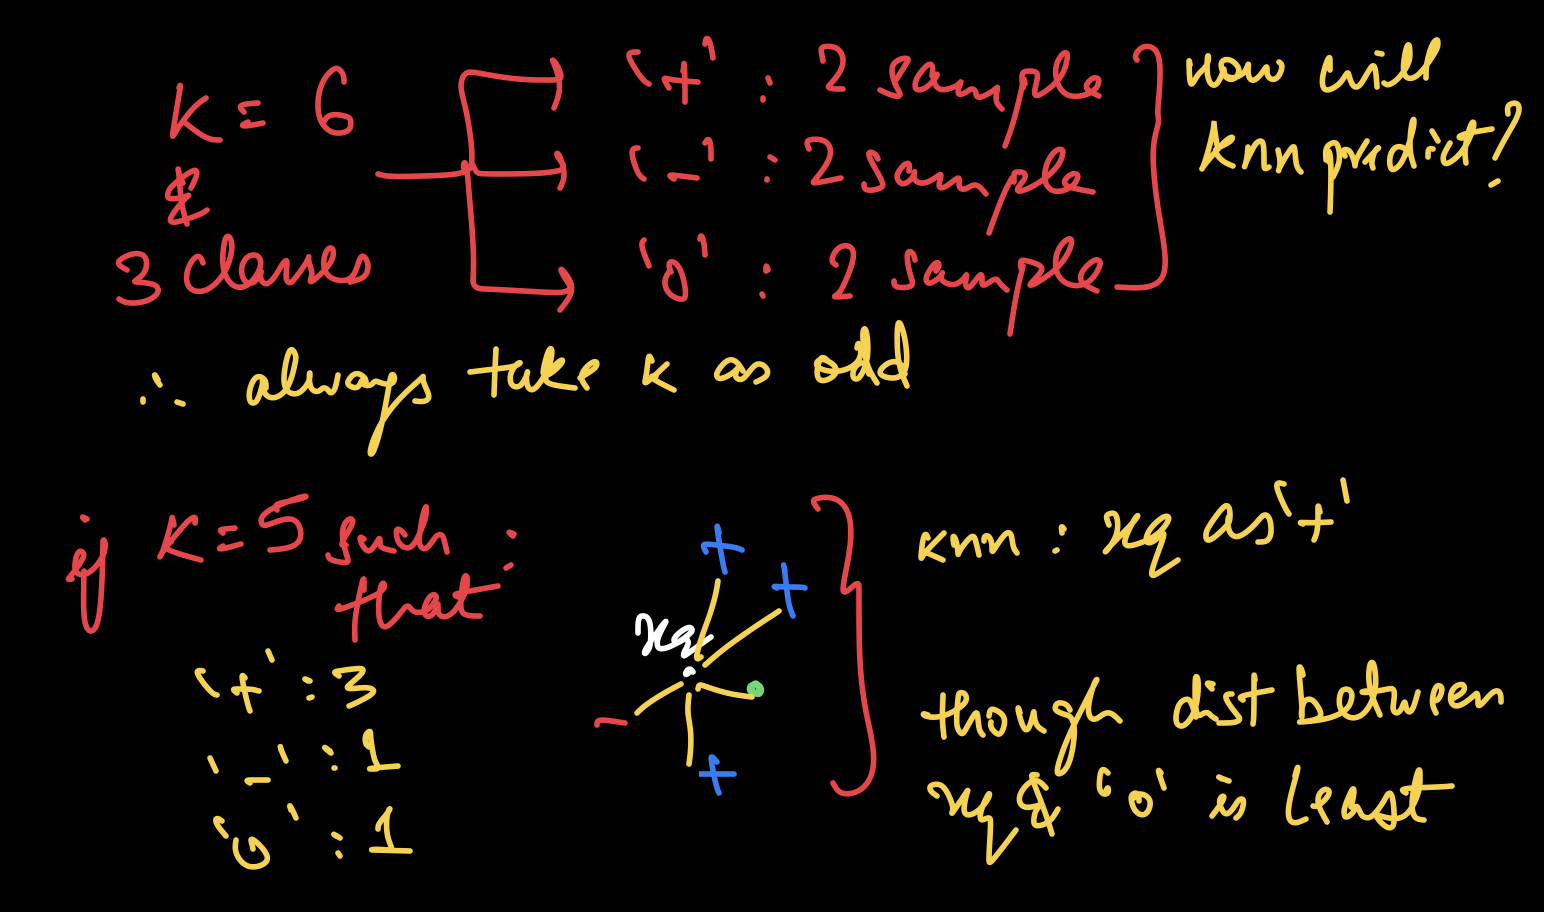

#### **Question: What if we take K=5, and we have all the +ve and -ve class labels datapoints  equidistant from $x_q$, then how KNN predicts class label for $x_q$ ?**
- KNN uses random choice here, where it can pick either of the +ve or -ve class label for $x_q$

- Or we can manupilate the value of K

- Though such cases are very rare to happen

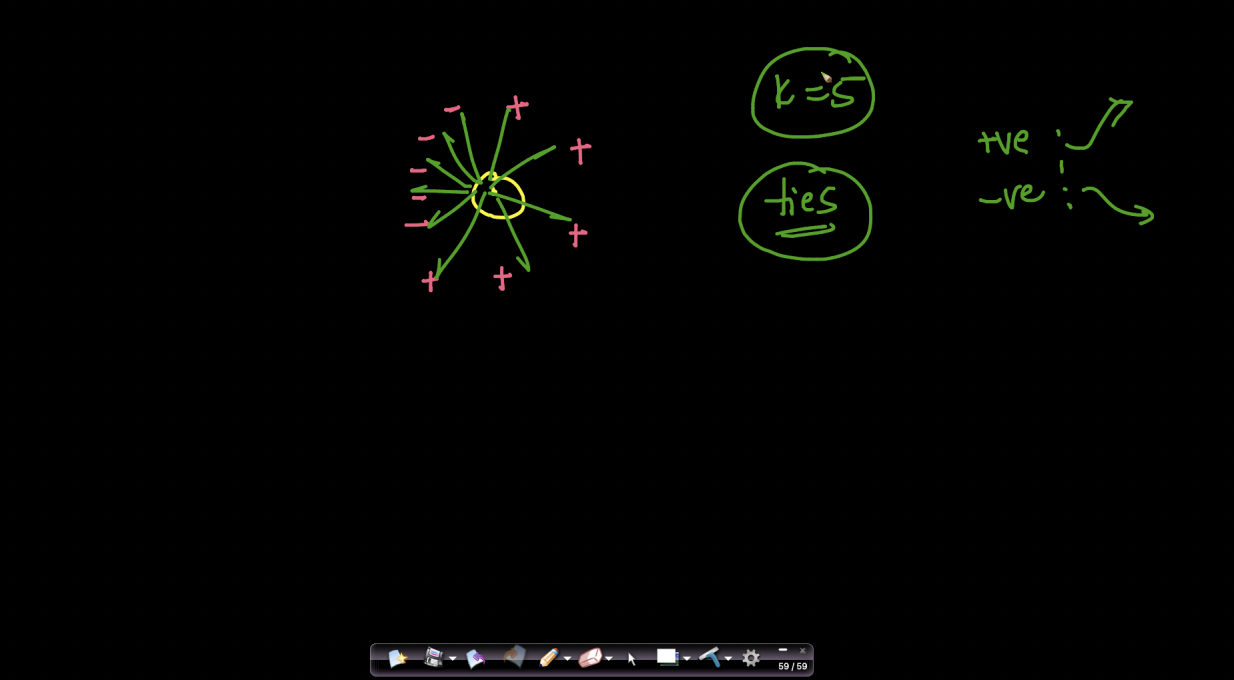

### Code Implementation for Weighted KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

w_knn = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')
w_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', weights='distance')

In [ ]:
y_pred = w_knn.predict(X_test)
w_knn.score(X_test, y_test)

0.9181818181818182

Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        20
           2       0.98      0.89      0.93        47
           3       0.90      1.00      0.95        43

    accuracy                           0.92       110
   macro avg       0.90      0.90      0.90       110
weighted avg       0.92      0.92      0.92       110



Confusion Matrix of KNN on Test Data

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

,1,2,3
1,16,1,3
2,3,42,2
3,0,0,43


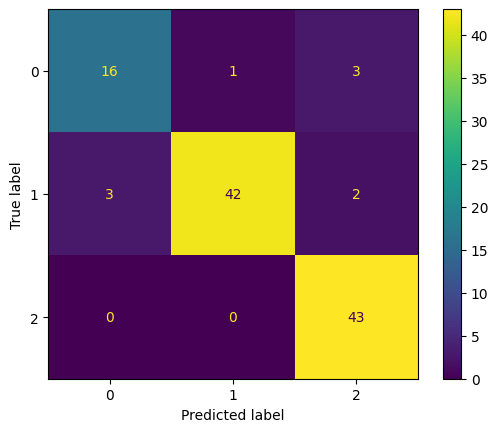

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()